In [1]:
from bertopic import BERTopic
import numpy as np

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
%reload_kedro
df = catalog.load("preprocessed_udacity")
df['description'] = df.description.replace(np.nan, '', regex=True)
df.head(30)
result = [x + '. ' + y for x, y in zip(df['title'], df['description'])]

result

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-02-07 17:11:22,189 - root - INFO - ** Kedro project coursing-ml
2021-02-07 17:11:22,192 - root - INFO - Defined global variable `context` and `catalog`
2021-02-07 17:11:22,193 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_udacity` (CSVDataSet)...


['Become a Data Engineer. Learn to design data models, build data warehouses and data lakes, automate data pipelines, and work with massive datasets. At the end of the program, you’ll combine your new skills by completing a capstone project.',
 'Become a Digital Marketer. Learn to create marketing content, use social media to amplify your message, make content discoverable in search, run Ads campaigns and advertise on Facebook. Additionally, learn how display and video ads work and how to market with email, and measure and optimize with Google Analytics.',
 'Become a UX Designer. You’ll learn how to create a digital user experience that is ready to be handed off for development. You’ll start by building familiarity and fluency with design research fundamentals to identify the user and the solutions they need. You’ll then synthesize your research, and use design sprints to take an idea from concept to low-fidelity prototype. Finally, you’ll learn how to turn your low-fidelity prototype 

In [ ]:
model = BERTopic(language="english")
topics, probabilities = model.fit_transform(result)

In [ ]:
model.get_topic_freq().head()

In [ ]:
model.visualize_topics()

In [ ]:
model.get_topics()

In [ ]:
print(result[9])
model.transform([result[9]])

In [9]:
from top2vec import Top2Vec

model_t2v = Top2Vec(documents=result, speed="learn", workers=8, embedding_model='distiluse-base-multilingual-cased', min_count=2)

2021-02-07 17:13:51,250 - top2vec - INFO - Pre-processing documents for training


2021-02-07 17:13:51,250 - top2vec - INFO - Pre-processing documents for training


2021-02-07 17:13:51,418 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model


2021-02-07 17:13:51,418 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2021-02-07 17:13:51,421 - root - INFO - Load pretrained SentenceTransformer: distiluse-base-multilingual-cased
2021-02-07 17:13:51,423 - root - INFO - Did not find folder distiluse-base-multilingual-cased
2021-02-07 17:13:51,425 - root - INFO - Try to download model from server: https://sbert.net/models/distiluse-base-multilingual-cased.zip
2021-02-07 17:13:51,427 - root - INFO - Downloading sentence transformer model from https://sbert.net/models/distiluse-base-multilingual-cased.zip and saving it at C:\Users\enrmeao/.cache\torch\sentence_transformers\sbert.net_models_distiluse-base-multilingual-cased


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 504M/504M [02:09<00:00, 3.89MB/s]


2021-02-07 17:16:13,028 - root - INFO - Load SentenceTransformer from folder: C:\Users\enrmeao/.cache\torch\sentence_transformers\sbert.net_models_distiluse-base-multilingual-cased
2021-02-07 17:16:18,121 - root - INFO - Use pytorch device: cpu


2021-02-07 17:16:18,123 - top2vec - INFO - Creating joint document/word embedding


2021-02-07 17:16:18,123 - top2vec - INFO - Creating joint document/word embedding


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2021-02-07 17:16:47,075 - top2vec - INFO - Creating lower dimension embedding of documents


2021-02-07 17:16:47,075 - top2vec - INFO - Creating lower dimension embedding of documents


2021-02-07 17:16:54,054 - top2vec - INFO - Finding dense areas of documents


2021-02-07 17:16:54,054 - top2vec - INFO - Finding dense areas of documents


2021-02-07 17:16:54,068 - top2vec - INFO - Finding topics


2021-02-07 17:16:54,068 - top2vec - INFO - Finding topics
2021-02-07 17:16:54,260 - tensorflow - WARNING - 5 out of the last 7 calls to <function recreate_function.<locals>.restored_function_body at 0x000001CE68C2B5E8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


In [10]:
model_t2v

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
model_t2v.get_num_topics()

3

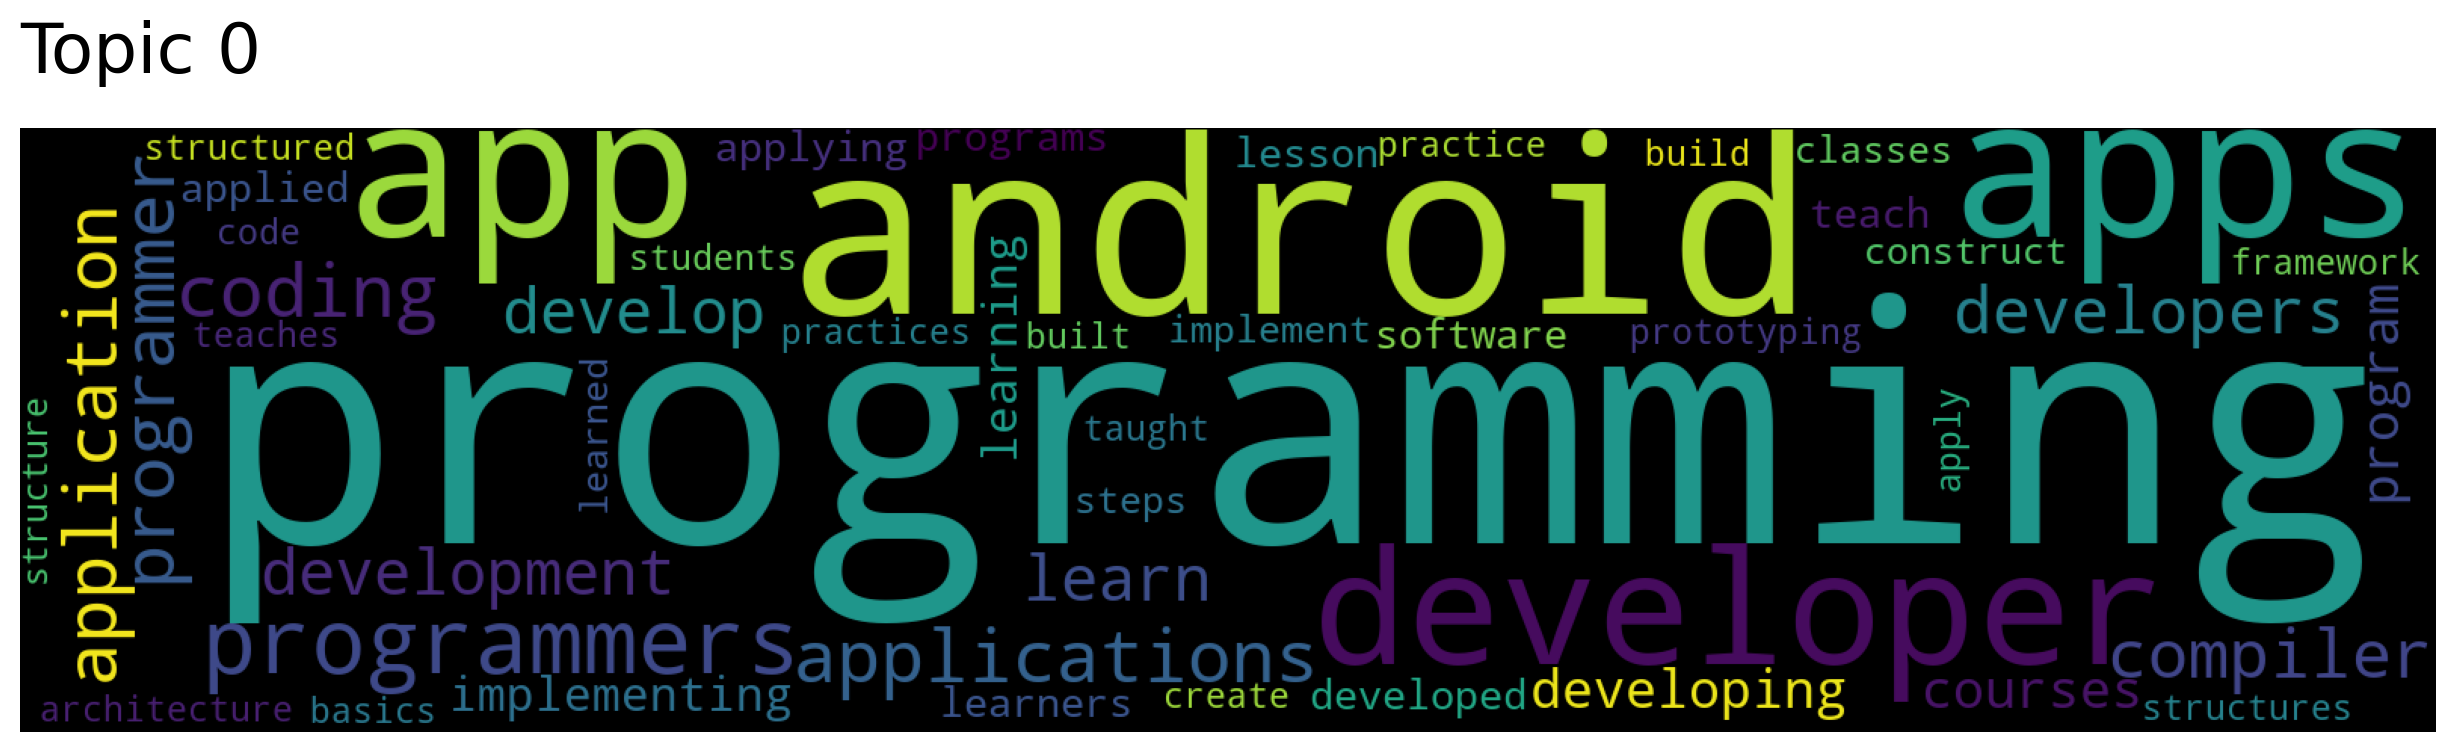

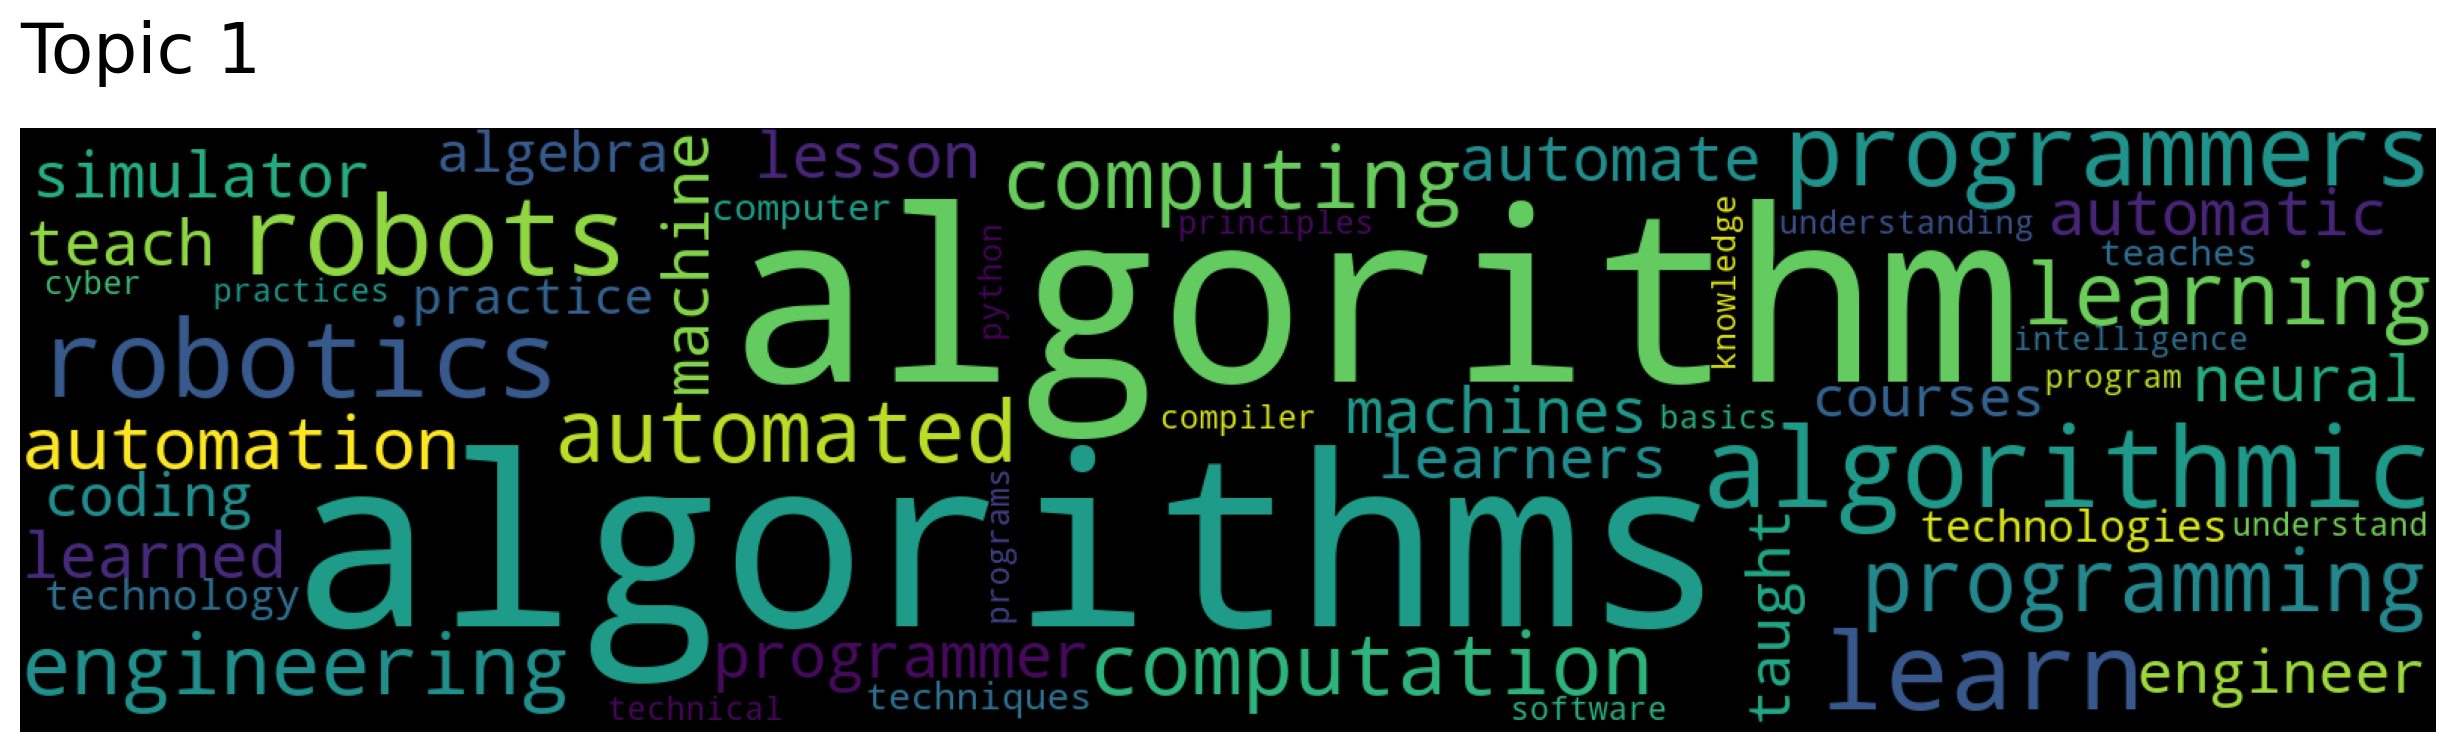

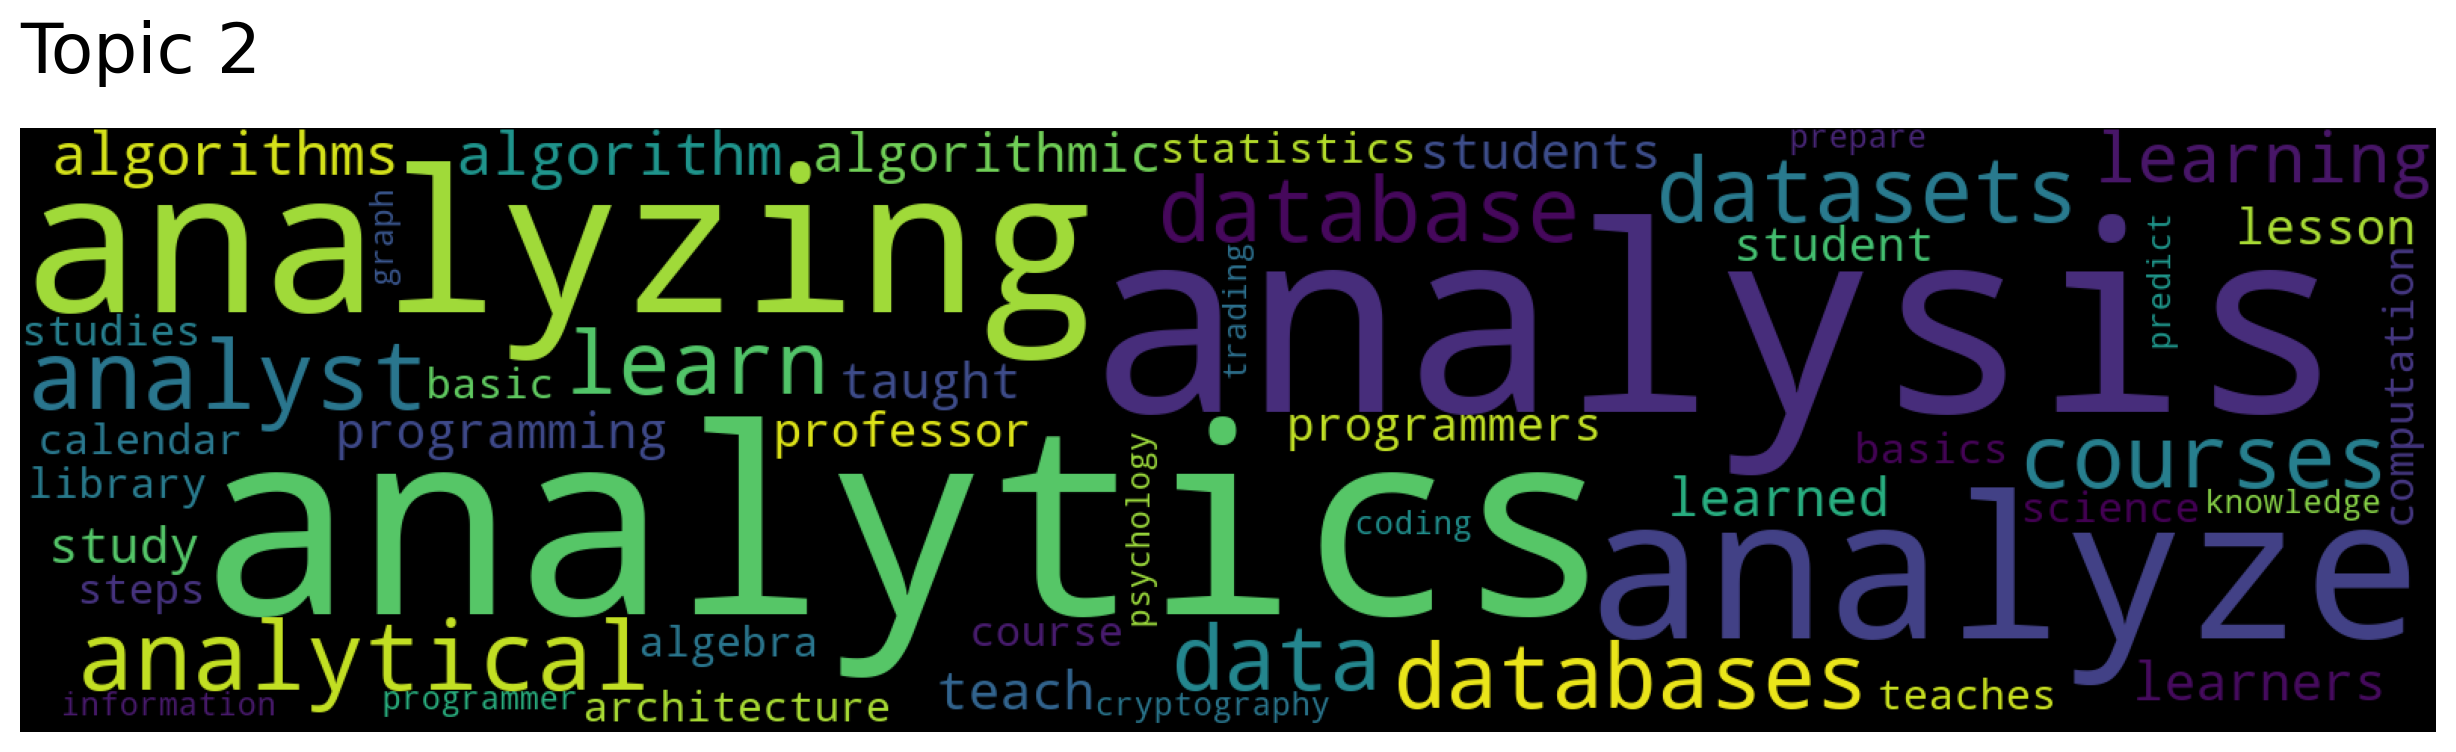

In [15]:
topic_words, word_scores, topic_nums = model_t2v.get_topics()
for topic in topic_nums:
    model_t2v.generate_topic_wordcloud(topic)